In [1]:
#--- Cargamos el paquete torch y otras utilidades
import torch
from torch.autograd import Variable # Para convertir nuestras varaibles a tensores

import numpy as np

x = np.linspace(-10, 10, 1000)
y = np.sin(x) + 0.5*np.random.rand(1000) # Calculamos una función senoidal

np.shape(x), np.shape(y)

((1000,), (1000,))

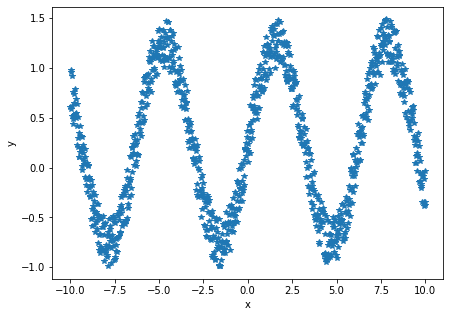

In [2]:
#--- Visualizamos los datos
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
plt.plot(x,y,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#--- Convertimos los numpy a tensores
X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

In [4]:
#--- Definimos la ANN
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 200),
                torch.nn.ReLU(),
                torch.nn.Linear(200, 100),
                torch.nn.ReLU(),
                torch.nn.Linear(100, 50),
                torch.nn.ReLU(),
                torch.nn.Linear(50, input_dim)
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=1, bias=True)
)

In [5]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

/home/debian/.local/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Epoch: [1/1], loss: 0.9794740080833435


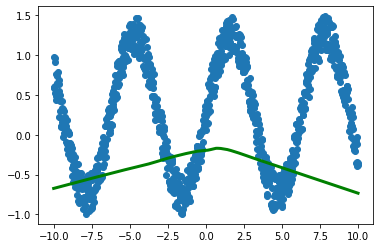

Epoch: [1/101], loss: 0.1528683304786682


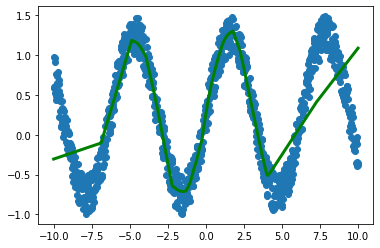

Epoch: [1/201], loss: 0.13525184988975525


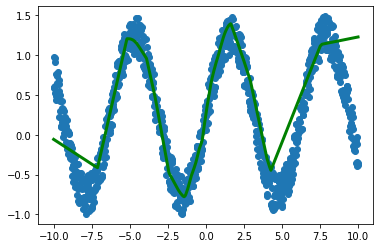

Epoch: [1/301], loss: 0.03752874210476875


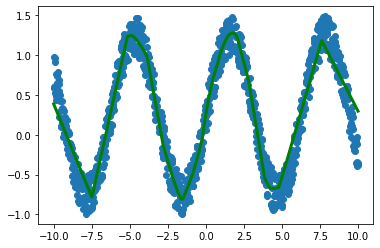

Epoch: [1/401], loss: 0.027151547372341156


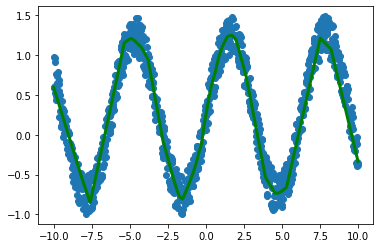

Epoch: [1/501], loss: 0.026881812140345573


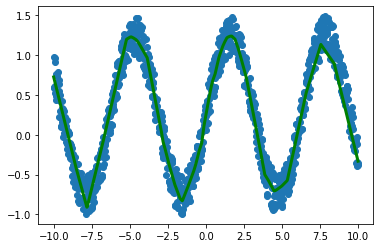

Epoch: [1/601], loss: 0.02194659784436226


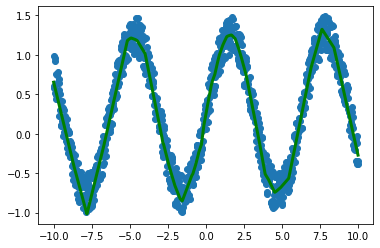

Epoch: [1/701], loss: 0.03468989580869675


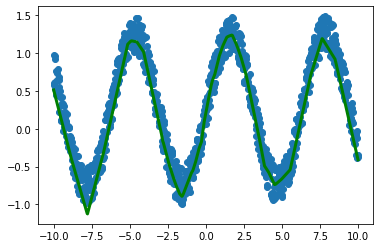

Epoch: [1/801], loss: 0.020536670461297035


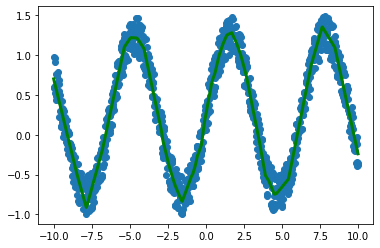

Epoch: [1/901], loss: 0.020122073590755463


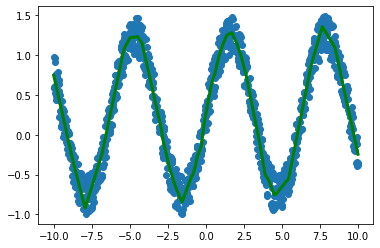

Epoch: [1/1001], loss: 0.01991572044789791


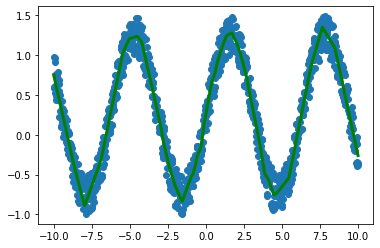

In [6]:
#-- Definimos el número de épocas
n_epoch = 1000
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%100 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-', lw=3)
      plt.show()

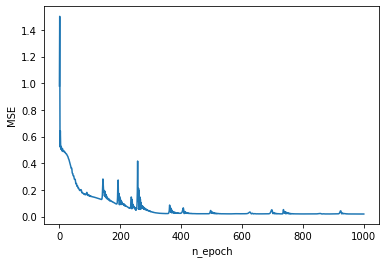

In [7]:
fig = plt.figure()
plt.plot(range(n_epoch+1), loss_list)
plt.xlabel('n_epoch')
plt.ylabel('MSE')
plt.show()